## Preparar el dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("air_pollution.csv")
df.dropna(inplace=True)
df.replace("..", np.nan, inplace=True)

year_cols = [col for col in df.columns if '[YR' in col]
df[year_cols] = df[year_cols].astype(float)

continents = pd.read_csv("https://gist.githubusercontent.com/alyssaq/3415363a18610d22f0d307bcaac857cd/raw/dfd032859f7badf16953878ac86f1b9e42caffbc/countries_continents.csv") 
continents = continents.rename(columns={
    "country_name": "country",
    "continent_name": "continent"
})

df = df.merge(continents, left_on="Country Name", right_on="country", how="inner")
df.drop(["2021 [YR2021]","2022 [YR2022]","2023 [YR2023]","2024 [YR2024]"],inplace=True,axis=1)

a_eliminar = ["2021 [YR2021]", "2022 [YR2022]", "2023 [YR2023]", "2024 [YR2024]"]

for col in a_eliminar:
    if col in year_cols:
        year_cols.remove(col)

df

C:\Users\Jorge\AppData\Local\Temp\ipykernel_11436\3365417014.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace("..", np.nan, inplace=True)


,Series Name,Series Code,Country Name,Country Code,1990 [YR1990],2000 [YR2000],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],continent_code,country_code,continent,country
0,"PM2.5 air pollution, mean annual exposure (mic...",EN.ATM.PM25.MC.M3,Afghanistan,AFG,64.174097,64.767280,73.490818,72.765910,65.862347,67.227177,58.330872,46.087094,AS,AF,Asia,Afghanistan
1,"PM2.5 air pollution, mean annual exposure (mic...",EN.ATM.PM25.MC.M3,Albania,ALB,22.961579,22.265189,19.121557,17.602164,18.555244,19.046186,15.704707,15.707004,EU,AL,Europe,Albania
2,"PM2.5 air pollution, mean annual exposure (mic...",EN.ATM.PM25.MC.M3,Algeria,DZA,22.359370,28.233108,25.618866,25.553153,24.752146,24.933590,24.388609,25.552656,AF,DZ,Africa,Algeria
3,"PM2.5 air pollution, mean annual exposure (mic...",EN.ATM.PM25.MC.M3,American Samoa,ASM,6.433882,6.789030,6.345877,6.929693,6.923399,6.981746,6.728532,6.715147,OC,AS,Oceania,American Samoa
4,"PM2.5 air pollution, mean annual exposure (mic...",EN.ATM.PM25.MC.M3,Andorra,AND,16.827185,16.221599,11.108894,10.106825,10.021919,9.895806,9.010875,9.080281,EU,AD,Europe,Andorra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,"PM2.5 air pollution, mean annual exposure (mic...",EN.ATM.PM25.MC.M3,Uruguay,URY,13.272875,12.944846,10.469213,10.262874,10.061362,10.134072,10.298591,10.571792,SA,UY,South America,Uruguay
179,"PM2.5 air pollution, mean annual exposure (mic...",EN.ATM.PM25.MC.M3,Uzbekistan,UZB,31.437401,30.713622,37.835629,37.548185,35.212157,34.835432,34.133199,31.960429,AS,UZ,Asia,Uzbekistan
180,"PM2.5 air pollution, mean annual exposure (mic...",EN.ATM.PM25.MC.M3,Vanuatu,VUT,14.698604,15.060760,13.468041,13.869738,13.671333,14.643925,14.336498,14.082412,OC,VU,Oceania,Vanuatu
181,"PM2.5 air pollution, mean annual exposure (mic...",EN.ATM.PM25.MC.M3,Zambia,ZMB,23.389564,24.388045,25.676742,26.165910,23.758282,23.336720,23.203748,24.308592,AF,ZM,Africa,Zambia


1. Realiza un gráfico (el que creas que sea oportuno) que muestre la tasa de crecimiento en la polución por continentes entre 2019 y 2020.

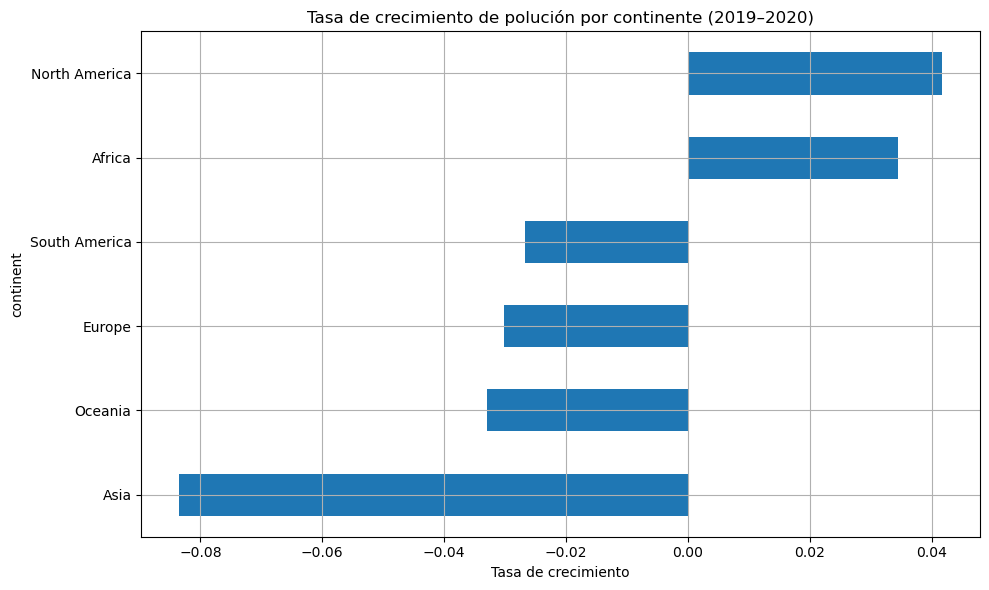

In [43]:
df_growth = df[["Country Name", "continent", "2020 [YR2020]", "2019 [YR2019]"]].dropna()
df_growth["growth_rate"] = (df_growth["2020 [YR2020]"] - df_growth["2019 [YR2019]"]) / df_growth["2020 [YR2020]"]
growth_by_continent = df_growth.groupby("continent")["growth_rate"].mean()

growth_by_continent.sort_values().plot(kind='barh', figsize=(10,6))
plt.title("Tasa de crecimiento de polución por continente (2019–2020)")
plt.xlabel("Tasa de crecimiento")
plt.grid(True)
plt.tight_layout()
plt.show()


In [44]:
stats_2018 = df[["continent", "2018 [YR2018]"]].dropna()
stats_2018

,continent,2018 [YR2018]
0,Asia,67.227177
1,Europe,19.046186
2,Africa,24.933590
3,Oceania,6.981746
4,Europe,9.895806
...,...,...
178,South America,10.134072
179,Asia,34.835432
180,Oceania,14.643925
181,Africa,23.336720


2. Media, moda y mediana por continente del año 2019.

In [45]:
stats_2018 = df[["continent", "2018 [YR2018]"]].dropna()
mean_2018 = stats_2018.groupby("continent").mean()
median_2018 = stats_2018.groupby("continent").median()
mode_2018 = stats_2018.groupby("continent").agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

summary_2018 = pd.concat([mean_2018, median_2018, mode_2018], axis=1)
summary_2018.columns = ['mean_2018', 'median_2018', 'mode_2018']
summary_2018.head()

,mean_2018,median_2018,mode_2018
continent,,,
Africa,35.810815,30.262339,9.355915
Asia,35.432959,30.174443,7.494856
Europe,13.951972,12.403978,5.496957
North America,17.707099,19.589280,6.701185
Oceania,10.479445,10.274736,6.142063


3. Calcula la varianza con una función apply() para el año 2017.


In [52]:
varianza_2017 = df.groupby("continent")["2017 [YR2017]"].apply(
    lambda x: ((x - x.mean())**2).sum() / (len(x.dropna()) - 1) if len(x.dropna()) > 1 else np.nan
)

print(varianza_2017)

continent
Africa           379.698174
Asia             379.100821
Europe            32.378163
North America     38.448554
Oceania            9.425332
South America     58.675688
Name: 2017 [YR2017], dtype: float64


4. Añadir al dataframe de 2020 la columna media respecto al continente al que pertenece y crear un campo para comparar la diferencia respecto a su continente en base a esta métrica.

In [55]:
df_2020 = df[["Country Name", "continent", "2020 [YR2020]"]].dropna()

media_continente = df_2020.groupby("continent")["2020 [YR2020]"].mean().to_dict()

df_2020["media_continente_2020"] = df_2020.apply(
    lambda row: media_continente.get(row["continent"], np.nan), axis=1
)

df_2020["diferencia_respecto_media"] = df_2020["2020 [YR2020]"] - df_2020["media_continente_2020"]

df_2020


,Country Name,continent,2020 [YR2020],media_continente_2020,diferencia_respecto_media
0,Afghanistan,Asia,46.087094,30.044734,16.042360
1,Albania,Europe,15.707004,12.041650,3.665354
2,Algeria,Africa,25.552656,34.683670,-9.131014
3,American Samoa,Oceania,6.715147,10.301948,-3.586801
4,Andorra,Europe,9.080281,12.041650,-2.961369
...,...,...,...,...,...
178,Uruguay,South America,10.571792,18.595047,-8.023255
179,Uzbekistan,Asia,31.960429,30.044734,1.915696
180,Vanuatu,Oceania,14.082412,10.301948,3.780463
181,Zambia,Africa,24.308592,34.683670,-10.375078


5. Crea un gráfico de lineas que mida el índice de polución con una línea por continente e indexado en el tiempo.

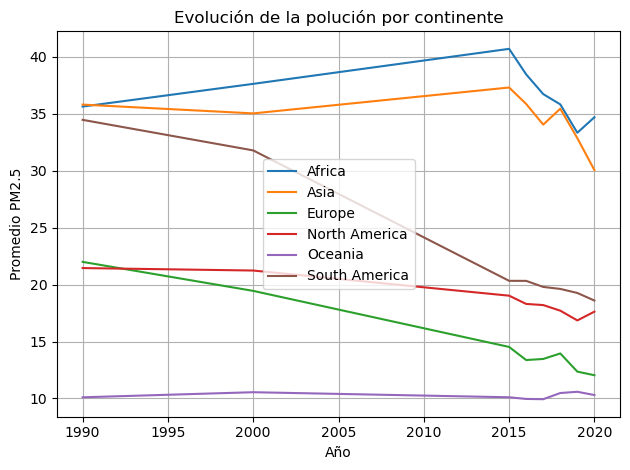

In [50]:
# Promedio por continente por año
df_long = df.melt(id_vars=["continent"], value_vars=year_cols, var_name="year", value_name="pollution")
df_long["year"] = df_long["year"].str.extract(r'(\d{4})').astype(int)

# Promediar por año y continente
df_plot = df_long.groupby(["continent", "year"])["pollution"].mean().reset_index()

# Gráfico
for continent in df_plot["continent"].unique():
    subset = df_plot[df_plot["continent"] == continent]
    plt.plot(subset["year"], subset["pollution"], label=continent)

plt.title("Evolución de la polución por continente")
plt.xlabel("Año")
plt.ylabel("Promedio PM2.5")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
